# Author: Varun SA
## Task 2: Prediction of optimum number of clusters by using unsupervised machine learning

# Graduate Rotational Internship Program @ THE SPARK FOUNDATION
### The K-Means clustering method is carried out to find the optimum number of clusters from given 'Iris' dataset.

### Technical Requirements

In [227]:
#importation of required libraries

from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [228]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data, columns =iris.feature_names)

In [229]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [230]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [231]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [232]:
iris_df.shape

(150, 4)

In [233]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [234]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [235]:
x=iris.data
y=iris.target

### visualising of the data

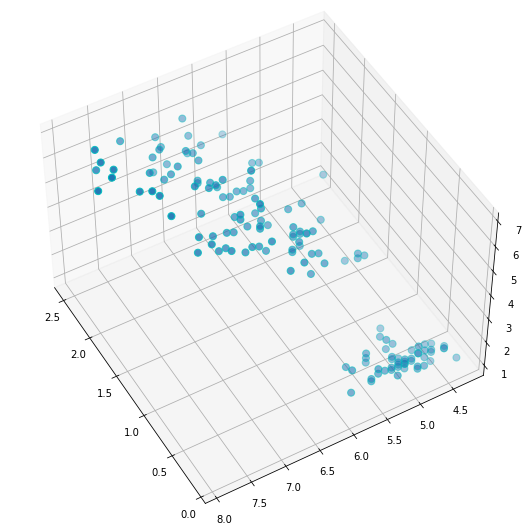

In [236]:
fig=plt.figure(1, figsize=(10,7))
ax= Axes3D(fig, rect=[0,0,0.95,1],elev=48,azim=150)
ax.scatter(x[:, 3], x[:, 0], x[:, 2],edgecolor='c',s=50)

### Plotting Elbow graph to find the optimum number of clustters

In [237]:
# we are using wcss (within cluters sum of squares), it finds the distance between the data points and the centroid
#10 iteration

WCSS=[]

for i in range(1,11):
    kmean=KMeans(i,init='k-means++', random_state=3)
    kmean.fit(x)
    WCSS.append(kmean.inertia_)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


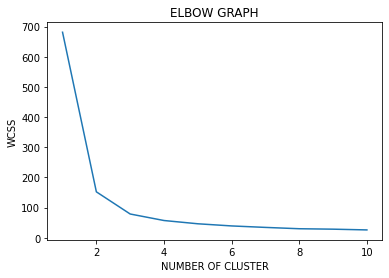

In [238]:
num= range(1,11)
plt.plot(num,WCSS)
plt.title('ELBOW GRAPH')
plt.xlabel('NUMBER OF CLUSTER')
plt.ylabel('WCSS')
plt.show()

### The optimum number of clutters is 3

## Model Training

In [243]:
# training the model
iris_model = KMeans(n_clusters=3)
y_prd= iris_model.fit_predict(x)
y_prd

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

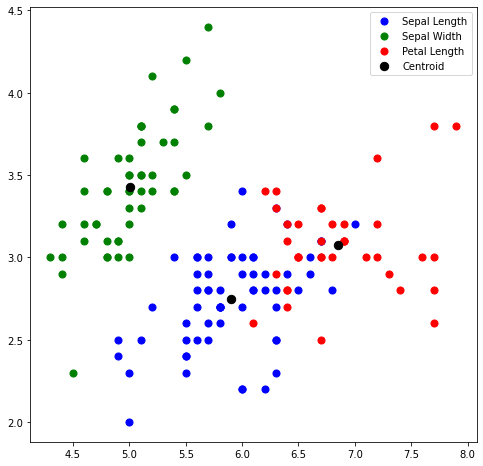

In [241]:
#plot the model
plt.figure(figsize=(8,8))
plt.scatter(x[y_prd==0,0], x[y_prd==0,1],
           s=50,color='blue', label='Sepal Length')
plt.scatter(x[y_prd==1,0], x[y_prd==1,1],
           s=50,color='green', label='Sepal Width')
plt.scatter(x[y_prd==2,0],x[y_prd==2,1],
            s=50,c='red',label='Petal Length')

#ploting the centroid
plt.scatter(iris_model.cluster_centers_[:,0],
            iris_model.cluster_centers_[:,1],
           s=70,c='black',label='Centroid')
plt.legend()
plt.show()